# Implementaion of PPCA model for Steady-State Flow Network Model

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df=pd.read_excel('MLDataset_final_noised.xlsx')

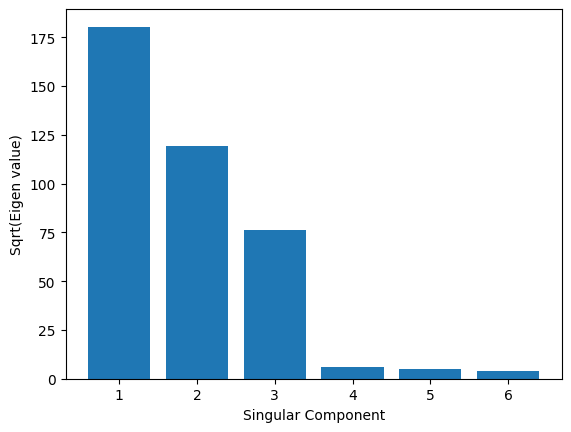

In [3]:
mean=np.mean(df,axis=0)
std=np.std(df,axis=0)
new_df=(df-mean)
data =new_df.to_numpy()
# we are taking vector vertically means(6 x 100)
T = data.T
# Doing SVD for T transpose
U,Sig,VT=np.linalg.svd(T.T)
V=VT.T
x_axis = np.arange(1,7)
# Plotting Singular Components
plt.bar(x_axis, Sig)
plt.xlabel('Singular Component')
plt.ylabel('Sqrt(Eigen value)')
plt.show()

In [4]:
T.shape

(6, 100)

In [5]:
VT

array([[-0.27411196,  0.12930805, -0.28988268, -0.69160606,  0.40307981,
         0.42815631],
       [ 0.50933345,  0.00528618, -0.4946646 ,  0.01487125, -0.50576227,
         0.48973646],
       [ 0.41426578,  0.69586624,  0.41814181,  0.12387658,  0.28266645,
         0.2721502 ],
       [ 0.18683125,  0.48652058, -0.42575892, -0.26684165, -0.06337671,
        -0.68694984],
       [-0.58666416,  0.45719621,  0.17387091, -0.04147851, -0.63066787,
         0.13077945],
       [-0.33874057,  0.23084847, -0.53378895,  0.65817138,  0.31634206,
         0.11735116]])

In [6]:
Sig

array([180.34499468, 119.05222106,  76.0091463 ,   6.06960957,
         4.82084014,   3.84909754])

In [7]:
B=Sig*Sig.T
sum1=np.sum(B)
print(B,sum1)

[3.25243171e+04 1.41734313e+04 5.77739032e+03 3.68401604e+01
 2.32404996e+01 1.48155519e+01] 52550.03497882898


In [8]:
var=[]
for i in Sig:
    var.append(((i*i)/sum1)*100)
print(f"% Variances captured are:{var}")

% Variances captured are:[61.89209411386075, 26.971307147224987, 10.994075119470521, 0.07010492073381466, 0.044225469398980956, 0.028193229310953142]


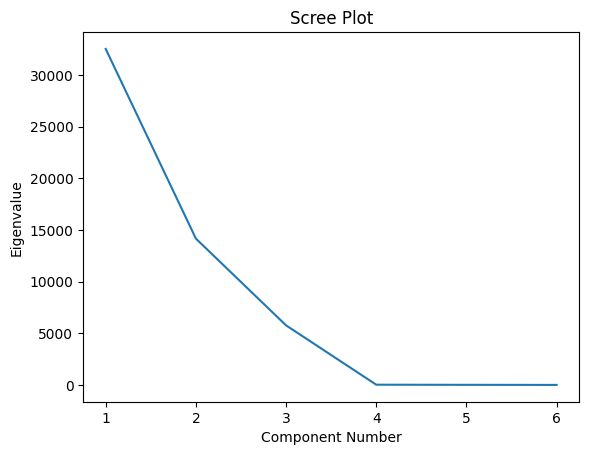

In [9]:
plt.plot(x_axis,B)
plt.xlabel("Component Number")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()

In [10]:
V2T = VT[3:]

In [11]:
import sympy
A_true = sympy.Matrix([[1, -1, 0, 0, 1, 0], [0, -1, 1, 0, 0, 1], [1, -1, 1, -1, 0, 0]])
RowEco_A_true, pivot_columns = A_true.rref()
RowEco_A_true

Matrix([
[1, 0, 0, -1,  0, -1],
[0, 1, 0, -1, -1, -1],
[0, 0, 1, -1, -1,  0]])

In [12]:
V2T = sympy.Matrix(V2T)
RowEco_V2T, pivot_columns = V2T.rref()
RowEco_V2T

Matrix([
[1, 0, 0, -1.04351433684803, -0.0187717892623999,   -1.02771425984033],
[0, 1, 0, -1.04138646169729,   -1.01562658948013,   -1.02803263757631],
[0, 0, 1, -1.02117739105143,   -1.01995204682422, -0.0122565375070622]])

In [13]:
Ans = RowEco_A_true - RowEco_V2T
Ans

Matrix([
[0, 0, 0, 0.0435143368480262, 0.0187717892623999, 0.0277142598403319],
[0, 0, 0, 0.0413864616972921, 0.0156265894801346, 0.0280326375763147],
[0, 0, 0, 0.0211773910514257, 0.0199520468242185, 0.0122565375070622]])

#PCA

In [14]:
# Reading the noise dataset (error)
error =pd.read_excel('MLDataset_final_error.xlsm')
var_error = np.var(error,axis=0)
var_error = np.array(var_error)
var_error

array([0.29105019, 0.26677332, 0.23120249, 0.19583022, 0.17932506,
       0.29235499])

In [15]:
#Subtracting mean of all samples from each of the vector
Ti = T - np.mean(T,axis=1)[:, np.newaxis]

In [16]:
# Constructing Covaraince matrix S
S =(1/100)*(Ti) @ (Ti).T
S.shape

(6, 6)

In [17]:
# Eigen Values and Eigen Vector of S.
VAL,VEC= np.linalg.eig(S)

In [18]:
print(VEC.shape,VAL.shape)

(6, 6) (6,)


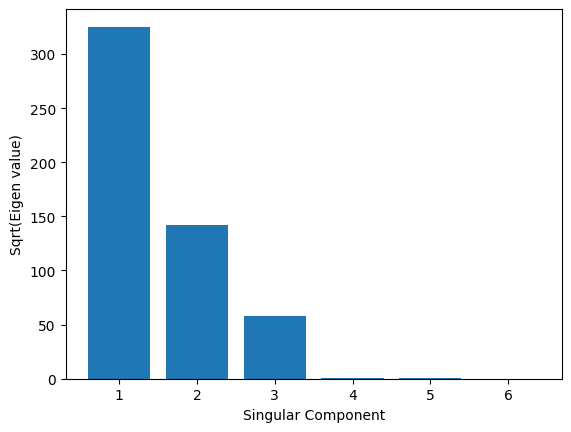

array([1, 2, 3, 4, 5, 6])

In [19]:
x_axis = np.arange(1,7)
# Plotting Singular Components
plt.bar(x_axis, VAL)
plt.xlabel('Singular Component')
plt.ylabel('Sqrt(Eigen value)')
plt.show()
x_axis

In [20]:
print(VEC)
print(VAL)

[[ 0.27411196  0.50933345 -0.41426578 -0.18683125 -0.58666416 -0.33874057]
 [-0.12930805  0.00528618 -0.69586624 -0.48652058  0.45719621  0.23084847]
 [ 0.28988268 -0.4946646  -0.41814181  0.42575892  0.17387091 -0.53378895]
 [ 0.69160606  0.01487125 -0.12387658  0.26684165 -0.04147851  0.65817138]
 [-0.40307981 -0.50576227 -0.28266645  0.06337671 -0.63066787  0.31634206]
 [-0.42815631  0.48973646 -0.2721502   0.68694984  0.13077945  0.11735116]]
[3.25243171e+02 1.41734313e+02 5.77739032e+01 3.68401604e-01
 2.32404996e-01 1.48155519e-01]


In [21]:
# Getting Principal axes
W_Pca = VEC[:,:3]
W_Pca_T = W_Pca.T

In [22]:
# Row echelon form the Wpca
W_PcaT = sympy.Matrix(W_Pca_T)
RowEco_W_Pca_T, pivot_columns = W_PcaT.rref()
RowEco_W_Pca_T

Matrix([
[1, 0, 0,  1.00010142856915,   -1.00101260169317, -0.0241598101499193],
[0, 1, 0, -1.01158150896018,    1.00067360205053,    1.00885568491893],
[0, 0, 1, 0.988885102793565, 0.00243156527047538,   -1.00413263434885]])

In [23]:
VEC_d_q = VEC[:,3:]
VEC_d_q

array([[-0.18683125, -0.58666416, -0.33874057],
       [-0.48652058,  0.45719621,  0.23084847],
       [ 0.42575892,  0.17387091, -0.53378895],
       [ 0.26684165, -0.04147851,  0.65817138],
       [ 0.06337671, -0.63066787,  0.31634206],
       [ 0.68694984,  0.13077945,  0.11735116]])

In [24]:
VEC_d_q_T = VEC_d_q.T
VEC.T@VEC

array([[ 1.00000000e+00, -3.33066907e-16,  4.57966998e-16,
         2.77555756e-16, -1.73472348e-16, -1.45716772e-16],
       [-3.33066907e-16,  1.00000000e+00, -2.77555756e-16,
         2.22044605e-16,  0.00000000e+00,  2.77555756e-17],
       [ 4.57966998e-16, -2.77555756e-16,  1.00000000e+00,
        -1.66533454e-16,  6.24500451e-17,  5.20417043e-16],
       [ 2.77555756e-16,  2.22044605e-16, -1.66533454e-16,
         1.00000000e+00, -1.88848936e-13, -2.86853874e-14],
       [-1.73472348e-16,  0.00000000e+00,  6.24500451e-17,
        -1.88848936e-13,  1.00000000e+00, -2.85866816e-13],
       [-1.45716772e-16,  2.77555756e-17,  5.20417043e-16,
        -2.86853874e-14, -2.85866816e-13,  1.00000000e+00]])

In [25]:
VEC_d_q_T = sympy.Matrix(VEC_d_q_T)
RowEco_VEC_d_q_T, pivot_columns = VEC_d_q_T.rref()
RowEco_VEC_d_q_T

Matrix([
[1, 0, 0, -1.04351433684803, -0.0187717892624006,  -1.02771425984033],
[0, 1, 0, -1.04138646169729,   -1.01562658948014,  -1.02803263757632],
[0, 0, 1, -1.02117739105143,   -1.01995204682422, -0.012256537507063]])

In [26]:
RowEco_A_true

Matrix([
[1, 0, 0, -1,  0, -1],
[0, 1, 0, -1, -1, -1],
[0, 0, 1, -1, -1,  0]])

# PPCA using Maximum Likelihood

In [27]:
L_VAL = VAL - var_error
Lq = np.sqrt(L_VAL[:3])
L_VAL

array([ 3.24952121e+02,  1.41467540e+02,  5.75427007e+01,  1.72571385e-01,
        5.30799376e-02, -1.44199471e-01])

In [28]:
Lq_diag = np.diag(Lq)
Lq_diag

array([[18.0264284 ,  0.        ,  0.        ],
       [ 0.        , 11.89401278,  0.        ],
       [ 0.        ,  0.        ,  7.58569052]])

In [29]:
U_q = VEC[:,:3]
U_q

array([[ 0.27411196,  0.50933345, -0.41426578],
       [-0.12930805,  0.00528618, -0.69586624],
       [ 0.28988268, -0.4946646 , -0.41814181],
       [ 0.69160606,  0.01487125, -0.12387658],
       [-0.40307981, -0.50576227, -0.28266645],
       [-0.42815631,  0.48973646, -0.2721502 ]])

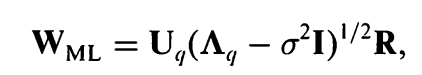

In [30]:
# here R = I
W_ML = U_q@Lq_diag;
W_ML

array([[ 4.94125969,  6.05801857, -3.14249203],
       [-2.33096226,  0.06287395, -5.27862597],
       [ 5.2255493 , -5.88354706, -3.17189435],
       [12.46718705,  0.17687887, -0.93968942],
       [-7.26608936, -6.01554286, -2.14422021],
       [-7.71812901,  5.82493176, -2.06444718]])

In [31]:
W_ML_T = W_ML.T

In [32]:
W_MLT = sympy.Matrix(W_ML_T)
RowEco_W_ML_T, pivot_columns = W_MLT.rref()
RowEco_W_ML_T

Matrix([
[1, 0, 0,  1.00010142856915,   -1.00101260169317, -0.0241598101499192],
[0, 1, 0, -1.01158150896018,    1.00067360205053,    1.00885568491893],
[0, 0, 1, 0.988885102793565, 0.00243156527047528,   -1.00413263434885]])

#PPCA using Expectation Maximization

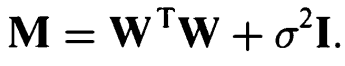

In [33]:
M = W_Pca_T@W_Pca + np.diag(var_error[:3])
M_inv  = np.linalg.inv(M)

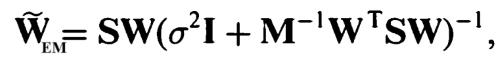

In [34]:
W_EM = S@W_Pca@np.linalg.inv(np.diag(var_error[:3]) + M_inv@(W_Pca_T)@S@(W_Pca))
W_EM

array([[ 0.35348392,  0.64367529, -0.50754435],
       [-0.16675053,  0.00668047, -0.85255165],
       [ 0.3738212 , -0.62513738, -0.51229312],
       [ 0.89186774,  0.0187937 , -0.15176938],
       [-0.51979574, -0.63916217, -0.34631332],
       [-0.55213339,  0.6189094 , -0.33342917]])

In [35]:
W_EM_T = W_EM.T

In [36]:
W_EMT = sympy.Matrix(W_EM_T)
RowEco_W_EM_T, pivot_columns = W_EMT.rref()
RowEco_W_EM_T

Matrix([
[1, 0, 0,  1.00010142856915,   -1.00101260169317, -0.0241598101499207],
[0, 1, 0, -1.01158150896018,    1.00067360205053,    1.00885568491893],
[0, 0, 1, 0.988885102793565, 0.00243156527047495,   -1.00413263434885]])

# Comparision of W_PCA, W_ML and W_EM transposes

In [37]:
RowEco_W_Pca_T

Matrix([
[1, 0, 0,  1.00010142856915,   -1.00101260169317, -0.0241598101499193],
[0, 1, 0, -1.01158150896018,    1.00067360205053,    1.00885568491893],
[0, 0, 1, 0.988885102793565, 0.00243156527047538,   -1.00413263434885]])

In [38]:
RowEco_W_ML_T

Matrix([
[1, 0, 0,  1.00010142856915,   -1.00101260169317, -0.0241598101499192],
[0, 1, 0, -1.01158150896018,    1.00067360205053,    1.00885568491893],
[0, 0, 1, 0.988885102793565, 0.00243156527047528,   -1.00413263434885]])

In [39]:
RowEco_W_EM_T

Matrix([
[1, 0, 0,  1.00010142856915,   -1.00101260169317, -0.0241598101499207],
[0, 1, 0, -1.01158150896018,    1.00067360205053,    1.00885568491893],
[0, 0, 1, 0.988885102793565, 0.00243156527047495,   -1.00413263434885]])

In [40]:
W_Pca

array([[ 0.27411196,  0.50933345, -0.41426578],
       [-0.12930805,  0.00528618, -0.69586624],
       [ 0.28988268, -0.4946646 , -0.41814181],
       [ 0.69160606,  0.01487125, -0.12387658],
       [-0.40307981, -0.50576227, -0.28266645],
       [-0.42815631,  0.48973646, -0.2721502 ]])

In [41]:
W_ML

array([[ 4.94125969,  6.05801857, -3.14249203],
       [-2.33096226,  0.06287395, -5.27862597],
       [ 5.2255493 , -5.88354706, -3.17189435],
       [12.46718705,  0.17687887, -0.93968942],
       [-7.26608936, -6.01554286, -2.14422021],
       [-7.71812901,  5.82493176, -2.06444718]])

In [42]:
W_EM

array([[ 0.35348392,  0.64367529, -0.50754435],
       [-0.16675053,  0.00668047, -0.85255165],
       [ 0.3738212 , -0.62513738, -0.51229312],
       [ 0.89186774,  0.0187937 , -0.15176938],
       [-0.51979574, -0.63916217, -0.34631332],
       [-0.55213339,  0.6189094 , -0.33342917]])